# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

## Inicialização

In [2]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import math

## Carregue os dados

In [3]:
# Carregue os arquivos de dados em diferentes DataFrames

calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

## Prepare os dados

- Com base nas informações obtidas na sequencia do código, consegui observar que há casos de dados faltantes e também casos em que será necessário alterar o tipo de dados.

## Planos

In [4]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprima uma amostra de dados dos planos
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


    Com base nos resultados obtidos através de .info() e .head() observo que a planilha tem apenas a informação geral dos planos, comparando os dois planos existentes. Ainda, os formatos dos dados (obtidos com .info()) estão de acordo com o esperado, não tendo valores ausentes também que mereçam destaque. 

## Usuários

In [6]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprima uma amostra de dados dos usuários
print(users.sample(5)) 
    #como são mais informações posso estar trabalhando com .sample(5) para uma amostragem de 5 linhas dentro do DataFrame
    #outra alternativa seria continuar trabalhando com .head()

     user_id first_name last_name  age  \
287     1287      Heide      Gill   74   
395     1395    Leonard    Wooten   24   
86      1086      Adena    Macias   36   
29      1029   Franklyn    Henson   59   
0       1000   Anamaria     Bauer   45   

                                          city    reg_date      plan  \
287        Sacramento–Roseville–Folsom, CA MSA  2018-03-15      surf   
395  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-19  ultimate   
86   New York-Newark-Jersey City, NY-NJ-PA MSA  2018-01-13  ultimate   
29     Tampa-St. Petersburg-Clearwater, FL MSA  2018-01-05      surf   
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   

    churn_date  
287        NaN  
395        NaN  
86         NaN  
29         NaN  
0          NaN  


- Conclusão
       Com base nos resultados obtidos temos apenas a coluna churn_date apresentando valores ausentes, o que significa que boa parte dos planos ainda estavam ativos quando os dados foram extraidos. 
       É necessário trabalhar os dados em reg_date e churn_date para converte-los para o tipo datetime. Vale ressaltar que os dados estão no formato ano-mês-dia.

### Corrija os dados

In [8]:
#transformando os dados das colunas reg_date e churn_date para o tipo datetime64

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

users.info() #conferir se alterou realmente para dateteime os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

Text(0.5, 0, 'Idade')

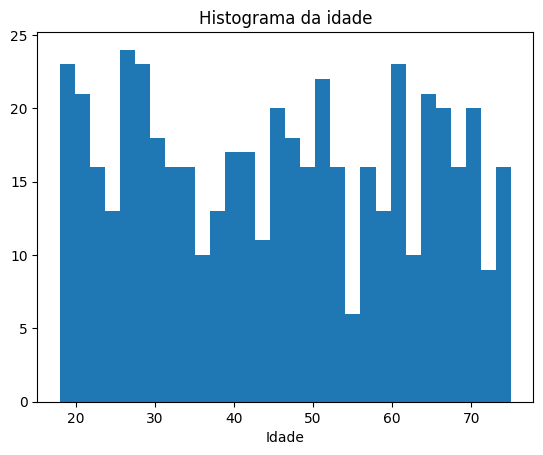

In [9]:
#histograma com distribuição da idade dos usuários

plt.hist(users['age'], bins=30)
plt.title('Histograma da idade')
plt.xlabel('Idade')

    Com base no histograma é possível observar que as idades dos assinantes dos planos apresentam uma ampla distribuição.

Text(0, 0.5, 'idade')

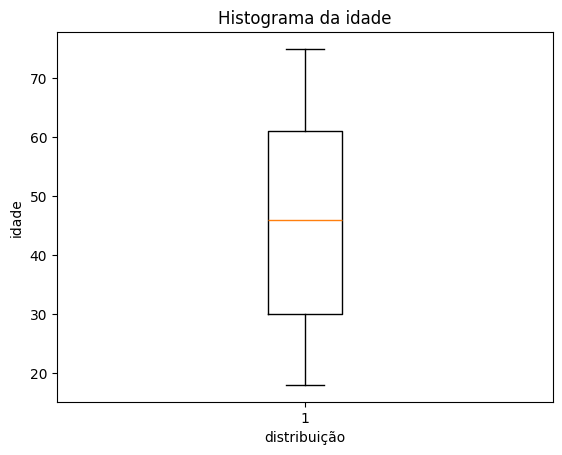

In [10]:
#fazendo um boxplot com relação a idade dos usuários dos planos
plt.boxplot(users['age'])
plt.title('Histograma da idade')
plt.xlabel('distribuição')
plt.ylabel('idade')

    De maneira complementar, o histograma mostra a distribuição dos dados, sem a presença de valores outliers.
    
    A idade poderia ser uma forma de justificar e entender os habitos de consumo dos planos quanto a ligações realizadas, número de mensagens enviadas e uso de internet.

## Chamadas

In [11]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprima uma amostra de dados das chamadas
print(calls.sample(5))
    #aqui também posso usar o método .sample(5) para uma amostragem aleatoria de 5 linhas dentro do DataFrame

print()
print(calls.head())

              id  user_id   call_date  duration
58110   1209_695     1209  2018-10-11     25.68
136519  1494_361     1494  2018-09-14      9.58
126379  1448_303     1448  2018-12-04      0.83
115542  1404_336     1404  2018-10-28     10.22
46854   1170_824     1170  2018-10-10      3.97

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


- Conclusão

    Analisando os dados do DataFrame calls, posso observar que são 137735 entradas em 4 colunas, as quais não apresentam nenhum valor ausente. Com relação aos tipos de dados, é necessário transformar os dados da coluna call_date de object para datetime e também arredondar os valores da coluna duration para cima, conforme instruções ("mesmo que a chamada tenaha durado apenas um segundo, um minuto sera contado")

### Corrija os dados


In [13]:
#Transformando a informação de data de object para datetime na respectiva coluna
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()  #conferindo se a alteração funcionou

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [14]:
# aplicar uma função para arredondar os dados de duração da chamada (duration) para minutos cheios
def arred_para_min(minutos):
    return math.ceil(minutos)

calls['duration'] = calls['duration'].apply(arred_para_min)

calls.info()
print()
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27         9
1  1000_145     1000 2018-12-27        14
2  1000_247     1000 2018-12-27        15
3  1000_309     1000 2018-12-28         6
4  1000_380     1000 2018-12-30         5


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Text(0.5, 0, 'Duração da ligação')

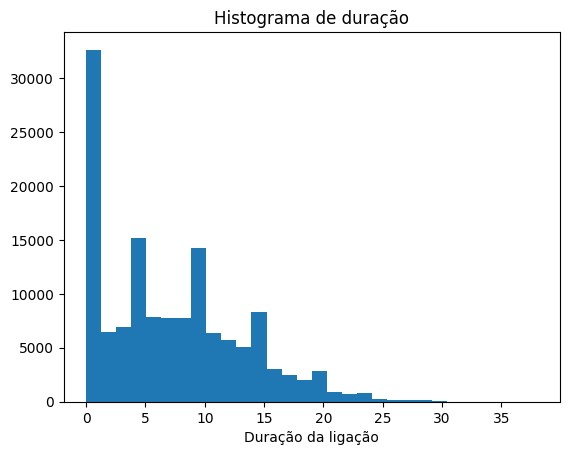

In [15]:
#histograma com distribuição da duração da ligação

plt.hist(calls['duration'], bins=30)
plt.title('Histograma de duração')
plt.xlabel('Duração da ligação')

    A distribuição da duração das ligações no histograma nos mostra uma maior participação dos valores até 10 minutos e mostra também que temos uma alta concentração de valor próximo a zero minutos.

Text(0.5, 0, 'Distribuição')

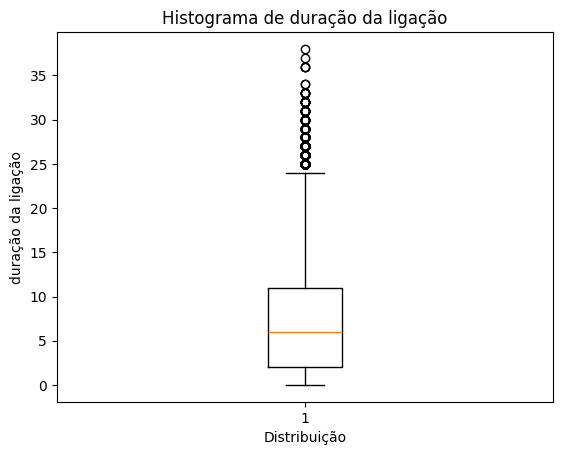

In [16]:
#montando um boxplot da duração das ligações

plt.boxplot(calls['duration'])
plt.title('Histograma de duração da ligação')
plt.ylabel('duração da ligação')
plt.xlabel('Distribuição')

    Com base no gráfico boxplot é possível observar que os dados de duração apresentam uma distribuição de proximo de zero até cerca de 25 minutos mas também apresenta alguns outliers.

## Mensagens

In [17]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprima uma amostra dos dados das mensagens
print(messages.sample(5))

             id  user_id message_date
37892  1250_145     1250   2018-10-29
62122   1391_34     1391   2018-09-23
54985   1347_22     1347   2018-11-17
54543   1346_45     1346   2018-10-14
55649  1349_549     1349   2018-10-16


- Conclusão

    No DataFrame messages observo que são três colunas e 76051 entradas, sendo que não existem valores ausentes em nenhuma das colunas. Existe nesse DataFrame uma coluna contendo informação de data que precisa ser transformada de object para datetime.

### Corrija os dados

In [19]:
#Transformando a informação de data de object para datetime na respectiva coluna
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') 
messages.info() #conferindo se 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriqueça os dados

Text(0, 0.5, 'Contagem')

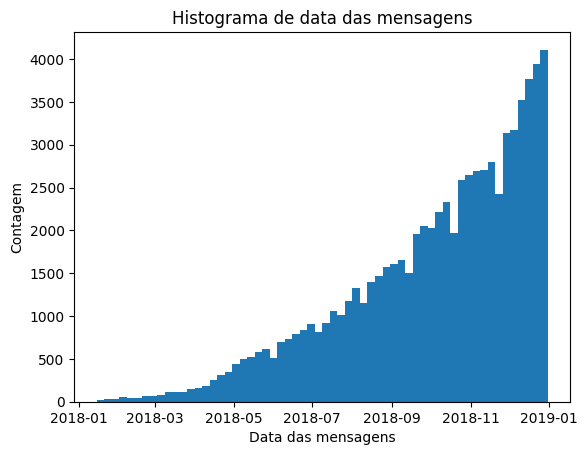

In [20]:
#histograma com distribuição da data das mensagens

plt.hist(messages['message_date'], bins=60)
plt.title('Histograma de data das mensagens')
plt.xlabel('Data das mensagens')
plt.ylabel('Contagem')

    Com base no histograma da data das mensagens, podemos observar um aumento na distribuição conforme chega o ano de 2019. Provavelmente em função da adesão de integrantes aos planos que ocorreu ao longo do ano.

## Internet

In [21]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
#  Imprima uma amostra de dados para o tráfego da internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


- Conclusão

    No DataFrame internet também observei que não há valores ausentes nas células, sendo necessário alterar session_date para o tipo datetime.

### Corrija os dados

In [23]:
#Transformando a informação de data de object para datetime na respectiva coluna
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriqueça os dados

Text(0.5, 0, 'Quantidade de internet utilizada')

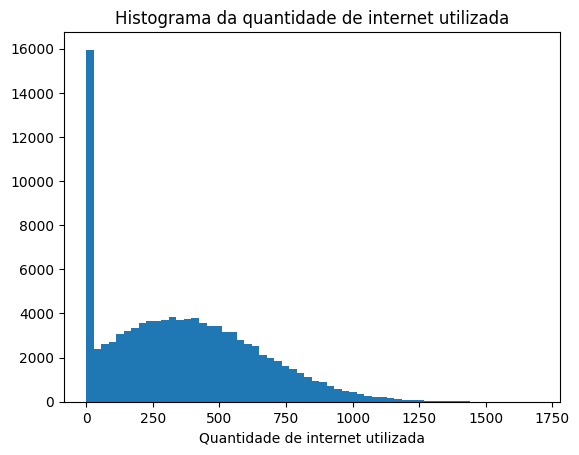

In [24]:
#histograma com distribuição da quantidade de internet utilizada

plt.hist(internet['mb_used'], bins=60)
plt.title('Histograma da quantidade de internet utilizada')
plt.xlabel('Quantidade de internet utilizada')

    O histograma de distribuição da quantidade de internet utilizada nos mostra valores em sua maioria segue uma distribuição mas que tem uma alta concentração de dados na quantidade zero de internet utilziada.

Text(0.5, 0, 'Distribuição')

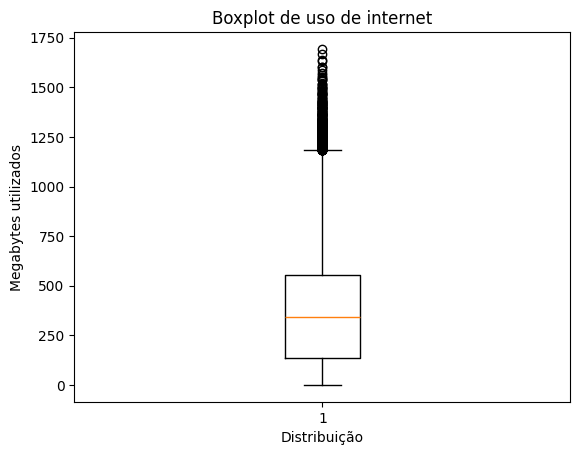

In [25]:
#montando um boxplot da quantidade de internet utilizada

plt.boxplot(internet['mb_used'])
plt.title('Boxplot de uso de internet')
plt.ylabel('Megabytes utilizados')
plt.xlabel('Distribuição')  

    Com base no boxplot contendo o total de internet utilizado é possível observar um alto número de valores outliers nos dados.

## Estude as condições dos planos

In [26]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
plans.info()
print()
print(plans.head()) #para olhar novamente o DataFrame (como é pequeno é mais visível as condições dos planos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10          

## Agregue os dados por usuário


In [27]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

#preciso extraír o mês da coluna 'call_date' e adicionar em uma coluna que vou chamar de 'month'
calls['month'] = calls['call_date'].dt.month

#agrupar os dados por 'user_id' e 'month', chamar os dados em uma coluna 'call_count' (contagem de ligações)
calls_monthly_count = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')

print(calls_monthly_count)

      user_id  month  call_count
0        1000     12          16
1        1001      8          27
2        1001      9          49
3        1001     10          65
4        1001     11          64
...       ...    ...         ...
2253     1498     12          39
2254     1499      9          41
2255     1499     10          53
2256     1499     11          45
2257     1499     12          65

[2258 rows x 3 columns]


In [28]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
calls['month'] = calls['call_date'].dt.month

#agrupar os dados por 'user_id' e 'month', chamar os dados em uma coluna 'minute_count'
user_minutes = calls.groupby(['user_id','duration']).size().reset_index(name='minute_count')
print(user_minutes)

       user_id  duration  minute_count
0         1000         2             1
1         1000         3             1
2         1000         4             1
3         1000         5             3
4         1000         6             4
...        ...       ...           ...
11023     1499        20             3
11024     1499        22             1
11025     1499        23             1
11026     1499        24             1
11027     1499        25             1

[11028 rows x 3 columns]


In [29]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messages['month'] = messages['message_date'].dt.month

#agrupar os dados por 'user_id' e 'month', chamar os dados em uma coluna 'message_count'
messages_user_month = messages.groupby(['user_id','month']).size().reset_index(name='message_count')

print(messages_user_month)

      user_id  month  message_count
0        1000     12             11
1        1001      8             30
2        1001      9             44
3        1001     10             53
4        1001     11             36
...       ...    ...            ...
1801     1496      9             21
1802     1496     10             18
1803     1496     11             13
1804     1496     12             11
1805     1497     12             50

[1806 rows x 3 columns]


In [30]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

internet['month'] = internet['session_date'].dt.month

#agrupar os dados por 'user_id' e 'month', chamar os dados em uma coluna 'internet_count'
internet_user_month = internet.groupby(['user_id','month']).size().reset_index(name='internet_count')
print(internet_user_month)

      user_id  month  internet_count
0        1000     12               5
1        1001      8              25
2        1001      9              53
3        1001     10              56
4        1001     11              51
...       ...    ...             ...
2272     1498     12              65
2273     1499      9              45
2274     1499     10              61
2275     1499     11              49
2276     1499     12              65

[2277 rows x 3 columns]


In [31]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

dados = calls.merge(messages_user_month, on=['user_id','month'], how='outer')
print(dados.head())
print()
dados.info()

         id  user_id  call_date  duration  month  message_count
0   1000_93     1000 2018-12-27       9.0     12           11.0
1  1000_145     1000 2018-12-27      14.0     12           11.0
2  1000_247     1000 2018-12-27      15.0     12           11.0
3  1000_309     1000 2018-12-28       6.0     12           11.0
4  1000_380     1000 2018-12-30       5.0     12           11.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137768 entries, 0 to 137767
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137768 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   month          137768 non-null  int32         
 5   message_count  110148 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 5.8+ M

In [32]:
#Unir as informações de dados com internet

dados_e_internet = dados.merge(internet, on=['user_id','month'], how='outer')

dados_e_internet = dados_e_internet.drop(['id_x','id_y','call_date','session_date'], axis='columns') 
    #aqui acabei removendo algumas informações desnecessárias com drop()

print(dados_e_internet.head())
print()
dados_e_internet.info()

   user_id  duration  month  message_count  mb_used
0     1000       9.0     12           11.0    89.86
1     1000       9.0     12           11.0     0.00
2     1000       9.0     12           11.0   660.40
3     1000       9.0     12           11.0   270.99
4     1000       9.0     12           11.0   880.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736736 entries, 0 to 6736735
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   duration       float64
 2   month          int32  
 3   message_count  float64
 4   mb_used        float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 231.3 MB


In [33]:
# Adicione as informações sobre o plano

#para isso preciso criar uma função que siga alguns os limites caracteristicos de cada um dos planos

def categorize_plan(row):
    if (row['duration'] > 500) or (row['message_count'] > 50) or (row['mb_used'] > 15360):
        return 'ultimate'
    else:
        return 'surf'


#aplicando a função no DataFrame dados_e_internet para criar uma coluna 'plan' contendo 'surf' ou 'ultimate' conforme as regras
dados_e_internet['plan'] = dados_e_internet.apply(categorize_plan, axis=1)



In [34]:
#conferindo se a coluna plan apresenta 'surf' e 'ultimate'
print(dados_e_internet.sample(5))
dados_e_internet.info()

         user_id  duration  month  message_count  mb_used      plan
5552651     1397       0.0     12            NaN   387.87      surf
5617139     1399      10.0     12           24.0   465.63      surf
4084951     1291       0.0     10           14.0   272.34      surf
4400168     1320       3.0      8           68.0   456.88  ultimate
767404      1061       2.0     12           93.0   310.56  ultimate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736736 entries, 0 to 6736735
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   duration       float64
 2   month          int32  
 3   message_count  float64
 4   mb_used        float64
 5   plan           object 
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 282.7+ MB


In [35]:
print(dados_e_internet['plan'].nunique()) # conferindo a quantidade de dados univocos na coluna plan (tem que ser 2 nesse caso)

2


Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. 

In [36]:
print(plans.head())  #para me ajudar a lembrar quais as condições dos planos para usar na sequência

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [37]:
# Calcule a receita mensal para cada usuário

#preciso definir algumas funções para calcular a receita conforme as particularidades de cada plano

# Calcular o custo de minutos
def calculate_minutes_cost(plan, duration):
    if plan == 'surf':
        return max(duration - 500, 0) * 0.03
    else:
        return max(duration - 3000, 0) * 0.01

# Calcular o custo de mensagens
def calculate_messages_cost(plan, message_count):
    if plan == 'surf':
        return max(message_count - 50, 0) * 0.03
    else:
        return max(message_count - 1000, 0) * 0.01

# Calcular o custo de dados
def calculate_data_cost(plan, mb_used):
    if plan == 'surf':
        return max((mb_used - 15360) / 1024, 0) * 10
    else:
        return max((mb_used - 30720) / 1024, 0) * 7

# Função para calcular a receita mensal com base nas condições do plano
def calculate_revenue(row):
    plan = row['plan']
    minutes_cost = calculate_minutes_cost(plan, row['duration'])
    messages_cost = calculate_messages_cost(plan, row['message_count'])
    data_cost = calculate_data_cost(plan, row['mb_used'])
    monthly_cost = 20 if plan == 'surf' else 70  # Preço mensal do plano

    return minutes_cost + messages_cost + data_cost + monthly_cost

# Aplicar a função a cada linha do DataFrame e criar uma nova coluna 'revenue' (receita)
dados_e_internet['revenue'] = dados_e_internet.apply(calculate_revenue, axis=1)



In [38]:
#agrupando os dados por user_id
receita_mensal_e_userid = dados_e_internet.groupby(['user_id'])['revenue'].mean().reset_index()

print(receita_mensal_e_userid.sample(10))

     user_id  revenue
473     1483  20.0000
95      1096  20.0000
140     1142  20.0000
30      1031  20.0000
441     1449      NaN
309     1315  20.0000
394     1402      NaN
223     1226      NaN
208     1211  51.3415
33      1034  20.0000


In [39]:
#unindo os DataFrames
receita_mensal = dados_e_internet.merge(receita_mensal_e_userid, on=['user_id'], how='outer')


In [40]:
print(receita_mensal.sample(10)) #usar sample para descobrir qual revenue (x ou y dropar)

         user_id  duration  month  message_count  mb_used      plan  \
4250200     1305       8.0      9            6.0    14.73      surf   
4187715     1299       3.0      6            6.0   502.94      surf   
3185237     1231      10.0     11            3.0    71.43      surf   
5879061     1415      11.0     12            NaN   618.14      surf   
4387572     1320       5.0      9           60.0   622.81  ultimate   
3977255     1281      10.0     11           45.0   424.37      surf   
4945787     1356       0.0     11           25.0   361.35      surf   
926614      1069      12.0     11          102.0    80.31  ultimate   
861300      1065       5.0     11           29.0   117.27      surf   
4612959     1330       7.0     12           98.0    91.69  ultimate   

         revenue_x  revenue_y  
4250200       20.0  20.000000  
4187715       20.0  20.000000  
3185237       20.0  20.000000  
5879061        NaN        NaN  
4387572       70.0  68.551612  
3977255       20.0  32.754

In [41]:
#removendo alguns valores indesejados
receita_mensal = receita_mensal.drop(['revenue_x'], axis='columns') 
#removido o revenue_x pois os dados ou davam 20 ou 70

In [42]:
#renomeando a coluna revenue_x para revenue
receita_mensal = receita_mensal.rename(columns={'revenue_y': 'revenue'})

print(receita_mensal.head())

   user_id  duration  month  message_count  mb_used  plan  revenue
0     1000       9.0     12           11.0    89.86  surf     20.0
1     1000       9.0     12           11.0     0.00  surf     20.0
2     1000       9.0     12           11.0   660.40  surf     20.0
3     1000       9.0     12           11.0   270.99  surf     20.0
4     1000       9.0     12           11.0   880.22  surf     20.0


In [43]:
print(receita_mensal.sample(10)) #conferindo novamente se os dados de revenue mudam conforme user_id

         user_id  duration  month  message_count  mb_used  plan  revenue
920052      1068       3.0      7            NaN     0.00  surf      NaN
4879533     1352      10.0     12           37.0   248.54  surf     20.0
6604048     1490       6.0      8            NaN   423.32  surf      NaN
4177228     1299      11.0      5            8.0   201.68  surf     20.0
5101772     1364      11.0     10           14.0   414.94  surf     20.0
3157486     1226       9.0     11            NaN   288.05  surf      NaN
993207      1073       3.0      5            NaN   653.07  surf      NaN
3239567     1232       4.0     10            4.0   210.26  surf     20.0
2149710     1157       0.0      9            NaN   209.60  surf      NaN
1177627     1085      11.0     10            NaN   180.48  surf      NaN


## Estude o comportamento do usuário

### Chamadas

<Figure size 1000x600 with 0 Axes>

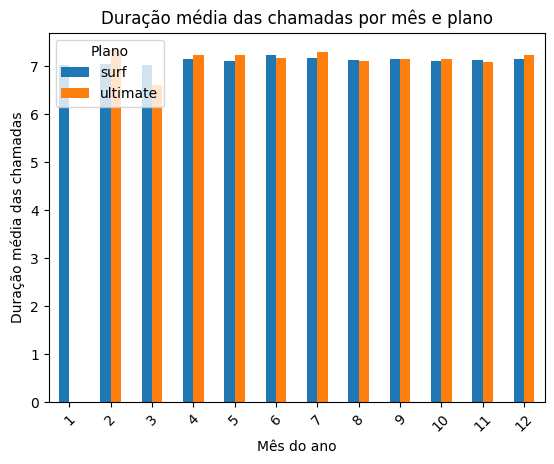

In [47]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

df_means = dados_e_internet.groupby(['month','plan'])['duration'].mean() #agrupar os dados com a duração média

#montar o gráfico agora com base no agrupamento
plt.figure(figsize=[10,6])
df_means.unstack().plot(kind='bar', title='Duração média das chamadas por mês e plano')
plt.xlabel('Mês do ano')
plt.ylabel('Duração média das chamadas')
plt.xticks(rotation=45)
plt.legend(title='Plano')

plt.show()

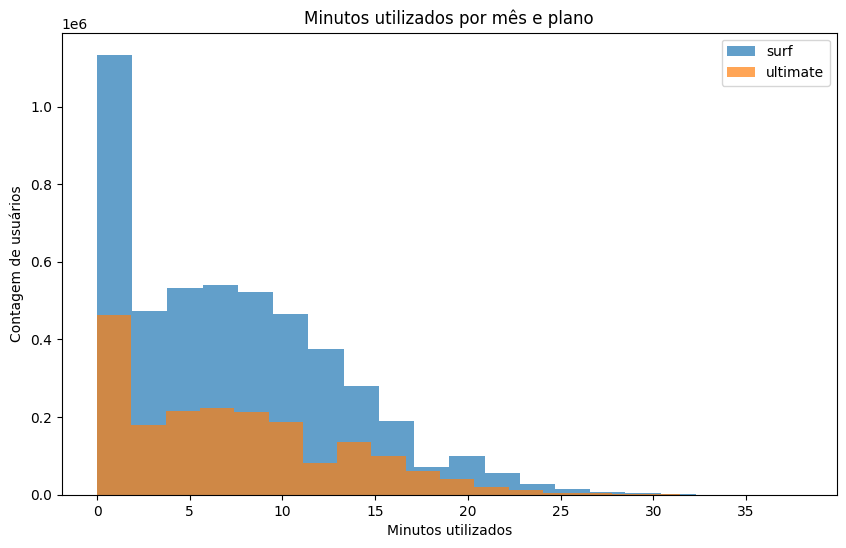

In [48]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.

plt.figure(figsize=(10, 6)) #determinar o tamanho da figura

#criando um ciclo for para iterar sobre os dados
for plan in dados_e_internet['plan'].unique():  #iterar sobre cada plano
    data = dados_e_internet[dados_e_internet['plan'] == plan]['duration']  #para cada plano vou selecionar os valores da coluna duration
    plt.hist(data, bins=20, alpha=0.7, label=plan) # e aqui crio o histograma 

plt.xlabel('Minutos utilizados')
plt.ylabel('Contagem de usuários')
plt.title('Minutos utilizados por mês e plano')
plt.legend()

#mostrar o histograma
plt.show()

In [49]:
# Calcule a média e a variação da duração mensal das chamadas

#preciso agrupar os dados pela coluna 'month' e calcular a média e a variância da coluna 'duration'
mean_e_var = dados_e_internet.groupby('month')['duration'].agg([np.mean, np.var,np.std])  

print(mean_e_var)


C:\Users\renan\AppData\Local\Temp\ipykernel_7036\3242429223.py:4: FutureWarning: The provided callable <function mean at 0x0000027ACE977740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_e_var = dados_e_internet.groupby('month')['duration'].agg([np.mean, np.var,np.std])
C:\Users\renan\AppData\Local\Temp\ipykernel_7036\3242429223.py:4: FutureWarning: The provided callable <function var at 0x0000027ACE9779C0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  mean_e_var = dados_e_internet.groupby('month')['duration'].agg([np.mean, np.var,np.std])


           mean        var       std
month                               
1      7.028287  34.318540  5.858203
2      7.109022  34.796994  5.898898
3      6.949642  33.330285  5.773239
4      7.145222  34.117404  5.841011
5      7.131819  36.049832  6.004151
6      7.215071  35.919217  5.993264
7      7.195222  35.207843  5.933620
8      7.112513  35.389445  5.948903
9      7.137688  35.878450  5.989862
10     7.119679  35.390084  5.948957
11     7.117958  35.211491  5.933927
12     7.170389  35.570631  5.964112


C:\Users\renan\AppData\Local\Temp\ipykernel_7036\3242429223.py:4: FutureWarning: The provided callable <function std at 0x0000027ACE977880> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  mean_e_var = dados_e_internet.groupby('month')['duration'].agg([np.mean, np.var,np.std])


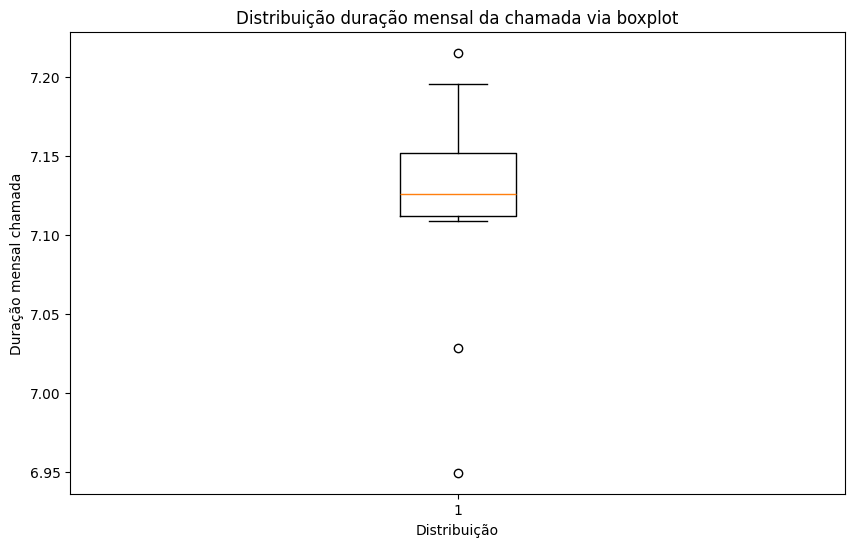

In [50]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas


mean_data = mean_e_var['mean'] #atribuindo a média a uma nova variável
plt.figure(figsize=[10,6])
plt.boxplot(mean_data)
plt.xlabel('Distribuição')
plt.ylabel('Duração mensal chamada')
plt.title('Distribuição duração mensal da chamada via boxplot')

plt.show()

- Conclusão

    Com base nos resultados, ao comparar a duração média das chamadas por mês e plano há um comportamento semelhante entre os usuários, e ao analisar o histograma ambos os planos apresentam uma distribuição semelhante  visualmente falando, e ao comparar a duração média pelo boxplot podemos observar que a maioria dos dados se encontra entre 7,12 e 7,20 minutos, apresentando três outliers  na casa dos 6,96; 7,03 e 7,22.
    Outra ponto que merece destaque é que os usuários do plano ultimate aparentemente não realizaram nenhuma ligação no mês 1 uma vez que não tem um gráfico de barras para esse mês.

### Mensagens

<Figure size 1000x600 with 0 Axes>

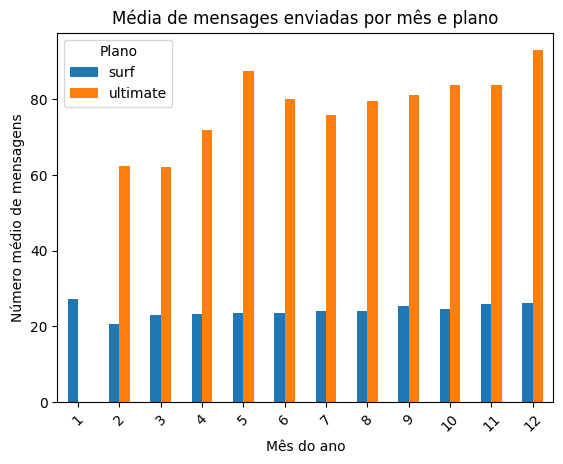

In [51]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

message_means = dados_e_internet.groupby(['month','plan'])['message_count'].mean()

plt.figure(figsize=[10,6])
message_means.unstack().plot(kind='bar', title='Média de mensages enviadas por mês e plano')
plt.xlabel('Mês do ano')
plt.ylabel('Número médio de mensagens')
plt.xticks(rotation=45)
plt.legend(title='Plano')

plt.show()


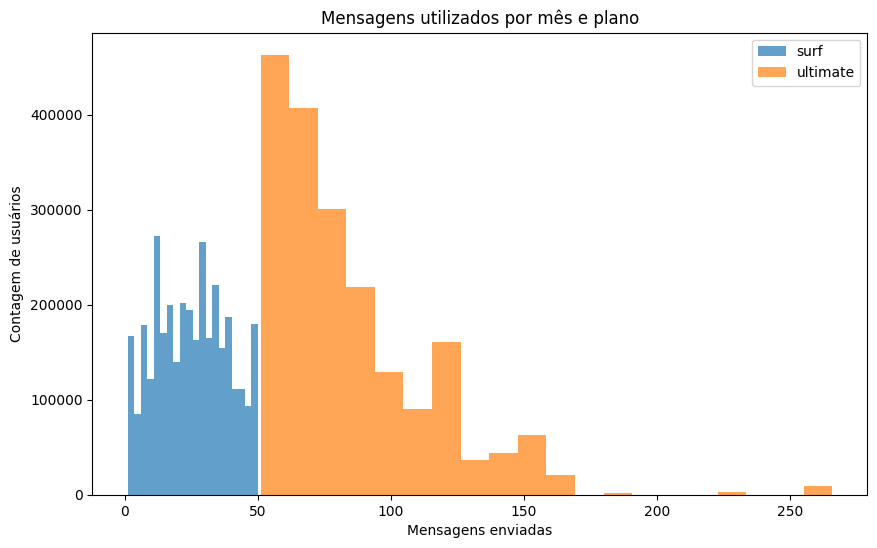

In [52]:
#montar um histograma quanto as mensagens

plt.figure(figsize=(10, 6)) #determinar o tamanho da figura

for plan in dados_e_internet['plan'].unique():  #iterar sobre cada plano
    data = dados_e_internet[dados_e_internet['plan'] == plan]['message_count']  #para cada plano vou selecionar os valores da coluna message_count
    plt.hist(data, bins=20, alpha=0.7, label=plan) # e aqui crio o histograma 

plt.xlabel('Mensagens enviadas')
plt.ylabel('Contagem de usuários')
plt.title('Mensagens utilizados por mês e plano')
plt.legend()

# Mostrar o histograma
plt.show()

C:\Users\renan\AppData\Local\Temp\ipykernel_7036\3207568717.py:4: FutureWarning: The provided callable <function mean at 0x0000027ACE977740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_e_var_message = dados_e_internet.groupby('month')['message_count'].agg([np.mean, np.var,np.std])
C:\Users\renan\AppData\Local\Temp\ipykernel_7036\3207568717.py:4: FutureWarning: The provided callable <function var at 0x0000027ACE9779C0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  mean_e_var_message = dados_e_internet.groupby('month')['message_count'].agg([np.mean, np.var,np.std])
C:\Users\renan\AppData\Local\Temp\ipykernel_7036\3207568717.py:4: FutureWarning: The provided callable <function std at 0x0000027ACE977880> is currently using SeriesGrou

           mean        var       std
month                               
1      7.028287  34.318540  5.858203
2      7.109022  34.796994  5.898898
3      6.949642  33.330285  5.773239
4      7.145222  34.117404  5.841011
5      7.131819  36.049832  6.004151
6      7.215071  35.919217  5.993264
7      7.195222  35.207843  5.933620
8      7.112513  35.389445  5.948903
9      7.137688  35.878450  5.989862
10     7.119679  35.390084  5.948957
11     7.117958  35.211491  5.933927
12     7.170389  35.570631  5.964112


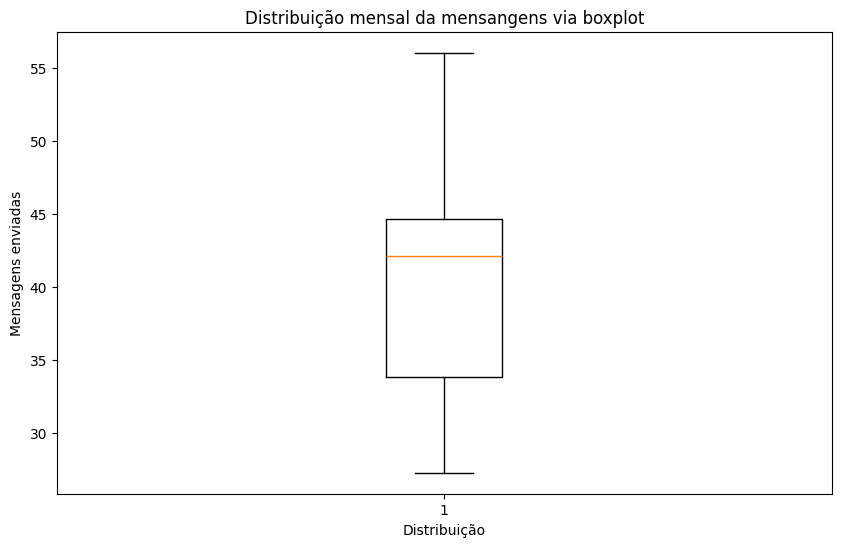

In [53]:
#montando umm boxplot para mensagens

#preciso agrupar os dados pela coluna 'month' e calcular a média e a variância da coluna 'message_count'
mean_e_var_message = dados_e_internet.groupby('month')['message_count'].agg([np.mean, np.var,np.std])  

print(mean_e_var)

mean_data_message = mean_e_var_message['mean']

plt.figure(figsize=[10,6])
plt.boxplot(mean_data_message)
plt.xlabel('Distribuição')
plt.ylabel('Mensagens enviadas')
plt.title('Distribuição mensal da mensangens via boxplot')

plt.show()

- Conclusão

    Com base nos dados observados, usuários do plano ultimate tendem a enviar muito mais mensagens mensalmente do que usuários do plano surf (muito provavelmente em função da maior disponibilidade de mensagens desse plano  que é de 20 vezes mais em comparação ao plano surf).
    O histograma me mostra distribuições diferentes na quantidade de mensagens enviadas em função das próprias características do plano.
    O boxplot mostra uma distribuição normal das mensagens, sem a presença de outliers

### Internet

<Figure size 1000x600 with 0 Axes>

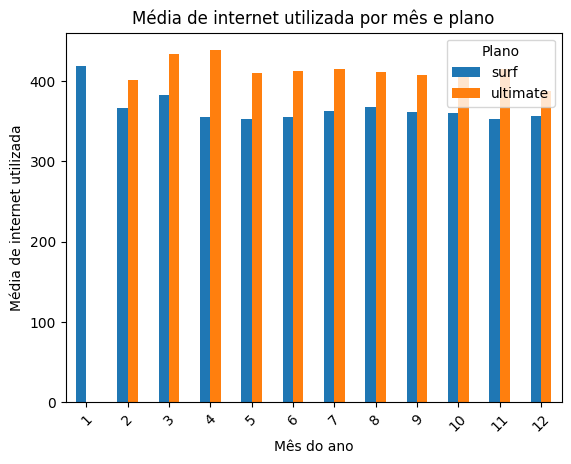

In [54]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

internet_means = dados_e_internet.groupby(['month','plan'])['mb_used'].mean()

plt.figure(figsize=[10,6])
internet_means.unstack().plot(kind='bar', title='Média de internet utilizada por mês e plano')
plt.xlabel('Mês do ano')
plt.ylabel('Média de internet utilizada')
plt.xticks(rotation=45)
plt.legend(title='Plano')

plt.show()

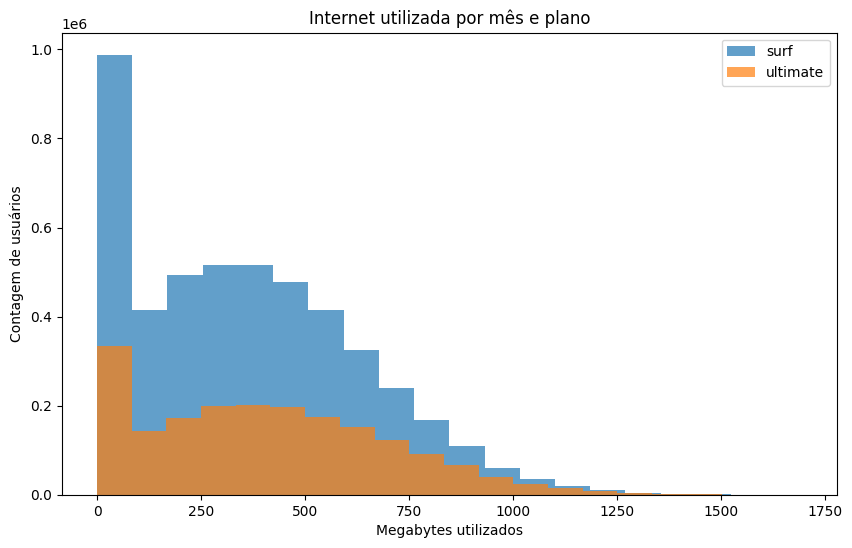

In [55]:
#montar um histograma para internet

plt.figure(figsize=(10, 6)) #determinar o tamanho da figura

for plan in dados_e_internet['plan'].unique():  #iterar sobre cada plano
    data = dados_e_internet[dados_e_internet['plan'] == plan]['mb_used']  #para cada plano vou selecionar os valores da coluna mb_used
    plt.hist(data, bins=20, alpha=0.7, label=plan) # e aqui crio o histograma 

plt.xlabel('Megabytes utilizados')
plt.ylabel('Contagem de usuários')
plt.title('Internet utilizada por mês e plano')
plt.legend()

# Mostrar o histograma
plt.show()

C:\Users\renan\AppData\Local\Temp\ipykernel_7036\957156699.py:4: FutureWarning: The provided callable <function mean at 0x0000027ACE977740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_e_var_internet = dados_e_internet.groupby('month')['mb_used'].agg([np.mean, np.var,np.std])
C:\Users\renan\AppData\Local\Temp\ipykernel_7036\957156699.py:4: FutureWarning: The provided callable <function var at 0x0000027ACE9779C0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  mean_e_var_internet = dados_e_internet.groupby('month')['mb_used'].agg([np.mean, np.var,np.std])
C:\Users\renan\AppData\Local\Temp\ipykernel_7036\957156699.py:4: FutureWarning: The provided callable <function std at 0x0000027ACE977880> is currently using SeriesGroupBy.std. In a

             mean           var         std
month                                      
1      419.365521  95442.461352  308.937633
2      375.390234  75902.403474  275.503908
3      390.585520  82507.859688  287.241814
4      364.926203  77420.739938  278.245826
5      367.273682  78083.253441  279.433809
6      368.182121  78016.419747  279.314195
7      375.771033  77664.817777  278.684082
8      379.360515  78696.119315  280.528286
9      373.787649  77778.903546  278.888694
10     374.147309  76743.222698  277.025672
11     369.874829  77406.476973  278.220195
12     367.631639  77545.172269  278.469338


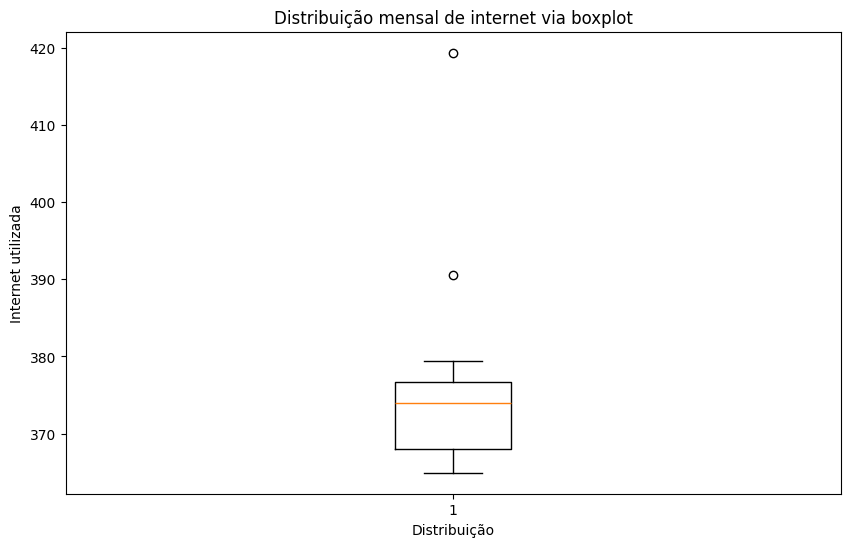

In [56]:
#montando umm boxplot para internet

#preciso agrupar os dados pela coluna 'month' e calcular a média e a variância da coluna 'mb_used'
mean_e_var_internet = dados_e_internet.groupby('month')['mb_used'].agg([np.mean, np.var,np.std])  

print(mean_e_var_internet)

mean_data_internet = mean_e_var_internet['mean']

plt.figure(figsize=[10,6])
plt.boxplot(mean_data_internet)
plt.xlabel('Distribuição')
plt.ylabel('Internet utilizada')
plt.title('Distribuição mensal de internet via boxplot')

plt.show()

- Conclusão

    Com base no gráfico de barras os usuários do plano ultimate tendem a utilzar mais internet por mês que os usuários do plano surf (novamente possivelmente em função da maior disponibilidade de internet para esse plano).
    O histograma mostra uma distribuição semelhante na utilização de internet pelos usuários, sendo que o plano ultimate tem mênos usuários.
    O boxplot mostra que temos uma variação pequena na distribuição apresnetando dois outliers para o conjunto de dados utilizado.

## Receita

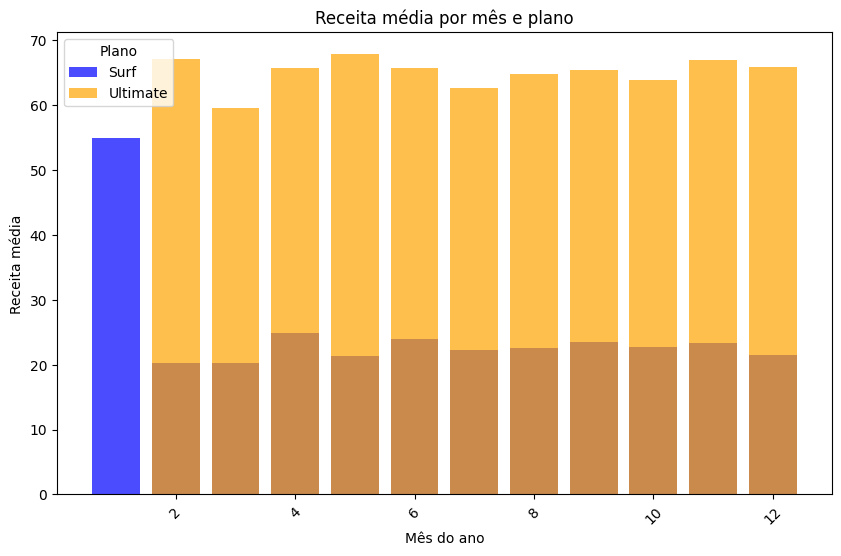

In [57]:
#preparando os dados para montagem do gráfico de barras
surf_data = receita_mensal[receita_mensal['plan'] == 'surf']
ultimate_data = receita_mensal[receita_mensal['plan'] == 'ultimate']

# Calcular a receita média mensal para cada plano
surf_monthly_revenue = surf_data.groupby('month')['revenue'].mean()
ultimate_monthly_revenue = ultimate_data.groupby('month')['revenue'].mean()

# Criar um gráfico de barras separando os planos
plt.figure(figsize=(10, 6))
plt.bar(surf_monthly_revenue.index, surf_monthly_revenue, label='Surf', color='blue', alpha=0.7)
plt.bar(ultimate_monthly_revenue.index, ultimate_monthly_revenue, label='Ultimate', color='orange', alpha=0.7)
plt.xlabel('Mês do ano')
plt.ylabel('Receita média')
plt.title('Receita média por mês e plano')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.show()

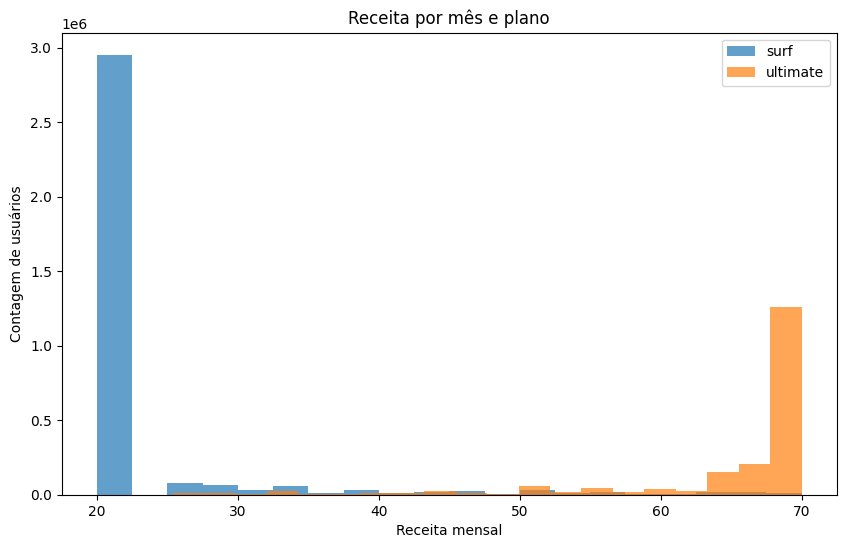

In [58]:
#montando o histograma para receita

plt.figure(figsize=(10, 6)) #determinar o tamanho da figura

for plan in receita_mensal['plan'].unique():  #iterar sobre cada plano
    data = receita_mensal[receita_mensal['plan'] == plan]['revenue']  #para cada plano vou selecionar os valores da coluna message_count
    plt.hist(data, bins=20, alpha=0.7, label=plan) # e aqui crio o histograma 

plt.xlabel('Receita mensal')
plt.ylabel('Contagem de usuários')
plt.title('Receita por mês e plano')
plt.legend()

# Mostrar o histograma
plt.show()

C:\Users\renan\AppData\Local\Temp\ipykernel_7036\4147817876.py:4: FutureWarning: The provided callable <function mean at 0x0000027ACE977740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_e_var_revenue = receita_mensal.groupby('month')['revenue'].agg([np.mean, np.var, np.std])
C:\Users\renan\AppData\Local\Temp\ipykernel_7036\4147817876.py:4: FutureWarning: The provided callable <function var at 0x0000027ACE9779C0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  mean_e_var_revenue = receita_mensal.groupby('month')['revenue'].agg([np.mean, np.var, np.std])


            mean         var        std
month                                  
1      54.922698  431.590835  20.774764
2      35.968671  495.980773  22.270626
3      28.735218  305.691769  17.484043
4      31.265815  362.451185  19.038151
5      36.485087  497.420856  22.302934
6      37.277752  488.955119  22.112330
7      35.502725  443.203386  21.052396
8      36.607773  468.607847  21.647352
9      37.372765  473.375755  21.757200
10     38.514862  487.819422  22.086634
11     38.346308  495.648348  22.263161
12     41.216587  534.558129  23.120513


C:\Users\renan\AppData\Local\Temp\ipykernel_7036\4147817876.py:4: FutureWarning: The provided callable <function std at 0x0000027ACE977880> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  mean_e_var_revenue = receita_mensal.groupby('month')['revenue'].agg([np.mean, np.var, np.std])


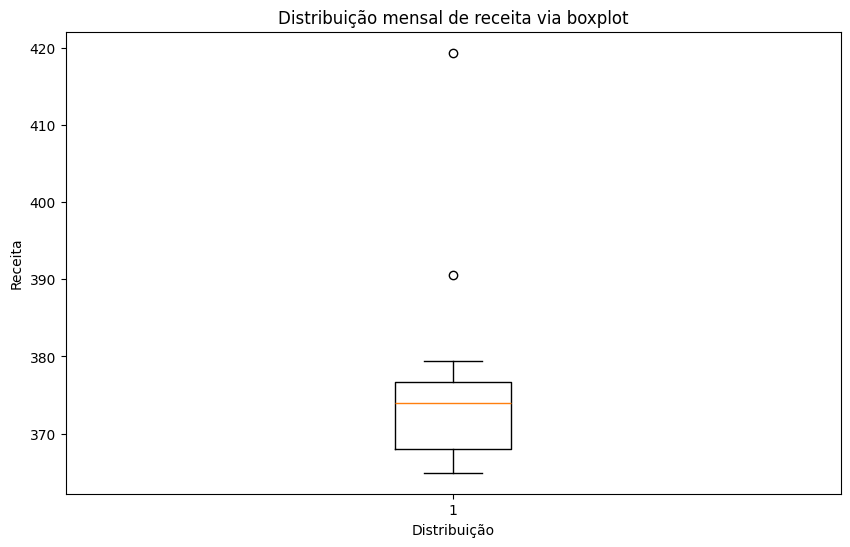

In [59]:
#montando umm boxplot para receita

#preciso agrupar os dados pela coluna 'month' e calcular a média e a variância da coluna 'revenue'
mean_e_var_revenue = receita_mensal.groupby('month')['revenue'].agg([np.mean, np.var, np.std])  

print(mean_e_var_revenue)

mean_data_revenue = mean_e_var_revenue['mean']

plt.figure(figsize=[10,6])
plt.boxplot(mean_data_internet)
plt.xlabel('Distribuição')
plt.ylabel('Receita')
plt.title('Distribuição mensal de receita via boxplot')

plt.show()

In [60]:
print(plans) #rever os dados para me ajudar a montar a conclusão.

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


- Conclusão

    Com base no gráfico de barras é possível observar uma certa variaçãonas receitas ao longo dos meses. O histograma permite observar uma maior concentração dos dados nos valores próximos aos valores originais dos planos. Já o boxplot permite observar que há dois outliers dentro das receitas.

## Teste hipóteses estatísticas

In [61]:
print(dados_e_internet.sample(10))

         user_id  duration  month  message_count  mb_used      plan  revenue
876455      1066       0.0      3           31.0    93.23      surf     20.0
5855454     1414      11.0     11           38.0     0.00      surf     20.0
2807939     1201      14.0      9            4.0   467.06      surf     20.0
6094719     1436      18.0      9            NaN   642.39      surf      NaN
6634748     1493       3.0     10            NaN   725.92      surf      NaN
4877586     1351       1.0     11           18.0   544.41      surf     20.0
4817619     1346      12.0     11           61.0    87.62  ultimate     70.0
1542748     1117       9.0      7            NaN   440.86      surf      NaN
919520      1068       9.0      7            NaN   246.92      surf      NaN
3626145     1256      17.0      9           17.0   562.93      surf     20.0


In [62]:
#preenchendo os dados vazios com a mediana
dados_e_internet['revenue'] = dados_e_internet['revenue'].fillna(dados_e_internet['revenue'].median())

In [63]:
# Teste as hipóteses

# Separar os dados em duas amostras, uma para cada plano
revenue_surf = dados_e_internet[dados_e_internet['plan'] == 'surf']['revenue']
revenue_ultimate = dados_e_internet[dados_e_internet['plan'] == 'ultimate']['revenue']

#aplicar o teste t-student
results = st.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

alpha = 0.05  #nível de significância

# Verificar se o valor p é menor que o nível de significância
if results.pvalue < alpha:
    print("Existe diferença entre as receitas médias.")
else:
    print("Não existe diferença entre as receitas médias.")

Existe diferença entre as receitas médias.


c:\Users\renan\Python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [64]:
# Juntar os dados obtidos até o momento com o DataFrame 'users' 

data_with_revenue = receita_mensal_e_userid.merge(users, on='user_id', how='outer')


In [65]:
#data_with_revenue = data_with_revenue.drop(['plan_y','first_name','last_name','churn_date','reg_date','age'], axis='columns') 
print(data_with_revenue.sample(10))

     user_id  revenue first_name last_name  age  \
386     1394     20.0  Alejandro    Carver   28   
239     1242     70.0   Lashunda     Johns   37   
79      1080      NaN       Neal     Mcgee   45   
348     1355     70.0      Digna     Tyson   57   
124     1125     70.0    Assunta    Carver   39   
257     1260     70.0       Alia   Aguilar   36   
107     1108      NaN   Porfirio      Kane   45   
396     1404     20.0    Paulita    Conley   33   
420     1428     20.0   Asuncion    Conrad   66   
445     1453     20.0       Robt     Tyler   51   

                                          city   reg_date      plan churn_date  
386                           Stockton, CA MSA 2018-01-16      surf        NaT  
239          San Antonio-New Braunfels, TX MSA 2018-06-02      surf        NaT  
79   New York-Newark-Jersey City, NY-NJ-PA MSA 2018-08-03      surf        NaT  
348     Los Angeles-Long Beach-Anaheim, CA MSA 2018-10-07      surf        NaT  
124      North Port-Sarasota-Brad

In [66]:
# Teste as hipóteses

# Separar os dados em duas amostras, uma para a área de NY-NJ e outra para as demais regiões
revenue_ny_nj = data_with_revenue[data_with_revenue['city'].str.contains('NY-NJ')]['revenue']
revenue_other_regions = data_with_revenue[~data_with_revenue['city'].str.contains('NY-NJ')]['revenue']

#teste t-student
result = st.ttest_ind(revenue_ny_nj, revenue_other_regions)

alpha = 0.05 #nível de significância

# Verificar se o valor p é menor que o nível de significância
if result.pvalue < alpha:
    print("Existe diferênça entre as médias das regiões.")
else:
    print("Não existe diferença nas receitas médias entre a área de NY-NJ e as demais regiões.")

Não existe diferença nas receitas médias entre a área de NY-NJ e as demais regiões.


## Conclusão geral

- Os DataFrames que apresentavam algum conjunto de dados no formato de data precisaram ser transformados do formato 'object' para 'datetime'. Além disso, conforme instruções do próprio projeto, foi necessário arredondar para minutos os segundos utilizados para ligação.
- Como se tratam de diferentes DataFrames contendo informações diferentes, foi necessário realizar a junção de albuns desses DataFrames para fazer a avaliação das informações.
- Com base nos dados observados através dos gráficos de barras, histograma e boxplot, apenas os dados de mensagens não apreseram outliers e nos demais foi possivel observar um padrão de consumo de ligações e internet com base no pacote de cada um dos planos.
- Ainda, com base nos dados observados, é possível concluir que existe diferença entre as receitas médias no geral. Porém, não existe diferença entre as receitas médias dos usuários das regiões NY-NJ para as demais regiões.